# Film Rental Business Performance & Customer Insights Analysis

## Project Objective
Analyze the Sakila DVD rental database to:
1. Understand customer behavior
2. Identify top-performing films and categories
3. Evaluate store and staff performance
4. Generate actionable business insights

## Database Exploration

In [17]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

conn = sqlite3.connect(r"C:/Users/Olaoluwa/Documents/Portfolio projects/Datasets/sakila db/sqlite-sakila.db")

In [2]:
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables

,name
0,actor
1,country
2,city
3,address
4,language
5,category
6,customer
7,film
8,film_actor
9,film_category


In [3]:
# function to read all tables; loads a single table at a time

def load_table(table_name):
    """Load any table from the SQLite database into a pandas DF, and returns table data as a DF"""
    query = f"SELECT * FROM {table_name}"      # write sql query with string formatting
    df = pd.read_sql(query, conn)        # execute the sql query using the DB connection
    return df

In [42]:
# function to load any sql query (joins, filters, analytics)

def load_query(query):
    """Execute any SQL query (including joins. Intended for analytics and reporting"""
    return pd.read_sql(query, conn)

In [4]:
actor = load_table("actor")
country = load_table("country")
city = load_table("city")
address = load_table("address")
language = load_table("language")
category = load_table("category")
customer = load_table("customer")
film = load_table("film")
film_actor = load_table("film_actor")
film_category = load_table("film_category")
film_text = load_table("film_text")
inventory = load_table("inventory")
staff = load_table("staff")
store = load_table("store")
payment = load_table("payment")
rental = load_table("rental")

In [13]:
# number of tables

len(tables)

16

In [5]:
# Read a table

df = pd.read_sql("SELECT * FROM actor", conn)
df.head()

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2021-03-06 15:51:59
1,2,NICK,WAHLBERG,2021-03-06 15:51:59
2,3,ED,CHASE,2021-03-06 15:51:59
3,4,JENNIFER,DAVIS,2021-03-06 15:51:59
4,5,JOHNNY,LOLLOBRIGIDA,2021-03-06 15:51:59


## Customer Analysis

1. How many customers are active vs inactive?

In [8]:
customer.head()

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36


In [15]:
customer["active"].unique()

array(['1', '0'], dtype=object)

In [12]:
active_inactive = customer.groupby("active")["customer_id"].count().reset_index()
active_inactive

,active,customer_id
0,0,15
1,1,584


The number '1' and '0' represents active and inactive customers respectively. There are 584 active customers and 15 inactive customers

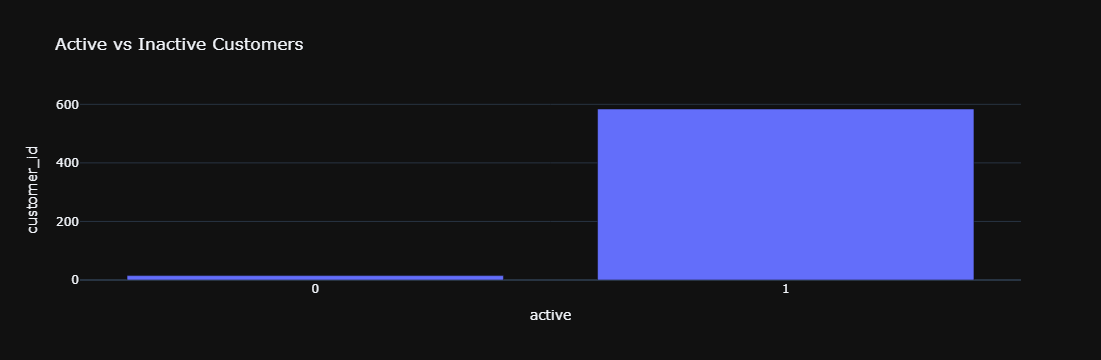

In [18]:
fig = px.bar(
    active_inactive,
    x = "active",
    y = "customer_id",
    title = "Active vs Inactive Customers",
    template = "plotly_dark"
)

fig.show()

2. Which countries have the most customers?

In [19]:
country.head(1)

,country_id,country,last_update
0,1,Afghanistan,2021-03-06 15:51:49


In [25]:
city.head(1)

,city_id,city,country_id,last_update
0,1,A Corua (La Corua),87,2021-03-06 15:51:49


In [26]:
address.head(1)

,address_id,address,address2,district,city_id,postal_code,phone,last_update
0,1,47 MySakila Drive,None,,300,None,,2021-03-06 15:51:54


In [27]:
country = country.drop(columns = "last_update")
city = city.drop(columns = "last_update")
address = address.drop(columns = "last_update")
customer = customer.drop(columns = "last_update")

In [20]:
# Based on the ERD, we need to join 4 tables:
# 1. country
# 2. city
# 3. address
# 4. customer

In [28]:
country_city = country.merge(
    city,
    how = "right",
    on = "country_id"
)
country_city.head(2)

,country_id,country,city_id,city
0,87,Spain,1,A Corua (La Corua)
1,82,Saudi Arabia,2,Abha


In [29]:
country_city_address_customer = (country_city.merge(address,
                                                   how = "right",
                                                   on = "city_id")).merge(customer,
                                                                          how = "right",
                                                                          on = "address_id"
                                                   )
country_city_address_customer.head(2)

,country_id,country,city_id,city,address_id,address,address2,district,postal_code,phone,customer_id,store_id,first_name,last_name,email,active,create_date
0,50,Japan,463,Sasebo,5,1913 Hanoi Way,None,,35200,,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,1,2006-02-14 22:04:36.000
1,103,United States,449,San Bernardino,6,1121 Loja Avenue,None,,17886,,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,1,2006-02-14 22:04:36.000


In [32]:
country_most_cust = country_city_address_customer.groupby("country")["customer_id"].count().reset_index()
country_most_cust = country_most_cust.sort_values("customer_id", ascending = False)
country_most_cust

,country,customer_id
42,India,60
21,China,53
101,United States,36
48,Japan,31
58,Mexico,30
...,...,...
94,Tunisia,1
96,Turkmenistan,1
97,Tuvalu,1
104,"Virgin Islands, U.S.",1


In [33]:
top_5_countries = country_most_cust.head(5)
top_5_countries

,country,customer_id
42,India,60
21,China,53
101,United States,36
48,Japan,31
58,Mexico,30


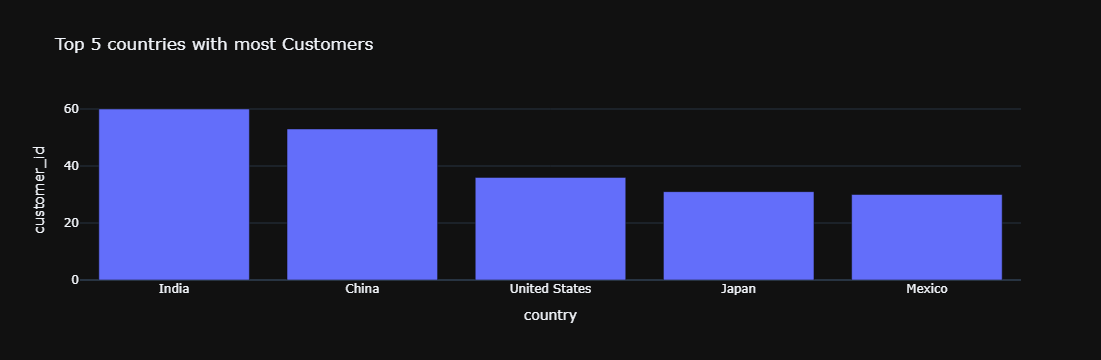

In [34]:
fig = px.bar(
    top_5_countries,
    x = "country",
    y = "customer_id",
    title = "Top 5 countries with most Customers",
    template = "plotly_dark"
)

fig.show()

3. Top 10 customers by:
   - Number of rentals
   - Total amount paid

In [ ]:
# join rental, customer, and payment.
# select rental_id, customer_id, first_name, payment_id, amount

In [43]:
rental.head(2)

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30.000,367,130,2005-05-26 22:04:30.000,1,2021-03-06 15:53:41
1,2,2005-05-24 22:54:33.000,1525,459,2005-05-28 19:40:33.000,1,2021-03-06 15:53:41


In [44]:
customer.head(2)

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36.000


In [45]:
payment.head(2)

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,1,76.0,2.99,2005-05-25 11:30:37.000,2021-03-06 15:55:57
1,2,1,1,573.0,0.99,2005-05-28 10:35:23.000,2021-03-06 15:55:57


In [46]:
# using sql query

query = """
SELECT
    c.customer_id,
    c.first_name,
    COUNT(DISTINCT r.rental_id) AS total_rentals,
    SUM(p.amount) AS total_amount
FROM customer c
JOIN rental r
    ON c.customer_id = r.customer_id
JOIN payment p
    ON c.customer_id = p.customer_id
GROUP BY
    c.customer_id, c.first_name
ORDER BY
    total_rentals DESC
LIMIT 10;
"""

In [47]:
top_customers = load_query(query)
top_customers

,customer_id,first_name,total_rentals,total_amount
0,148,ELEANOR,46,9960.84
1,526,KARL,45,9969.75
2,144,CLARA,42,8214.36
3,236,MARCIA,42,7374.36
4,75,TAMMY,41,6379.19
5,197,SUE,40,6184.00
6,469,WESLEY,40,7104.00
7,137,RHONDA,39,7589.79
8,178,MARION,39,7589.79
9,468,TIM,39,6848.79


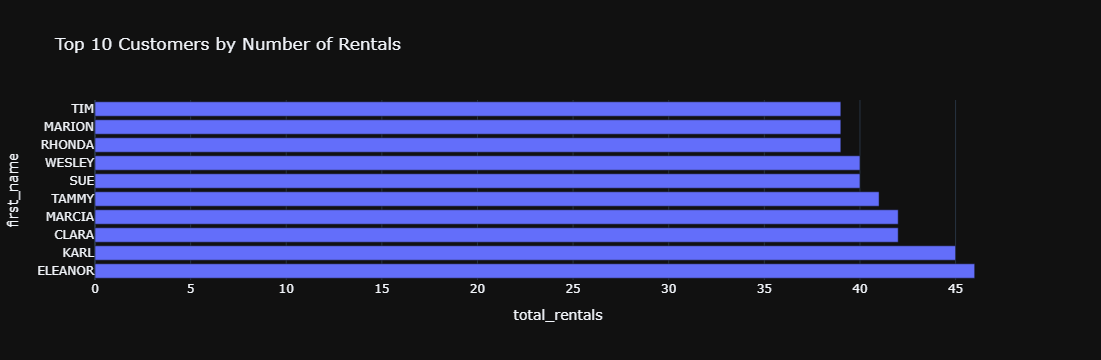

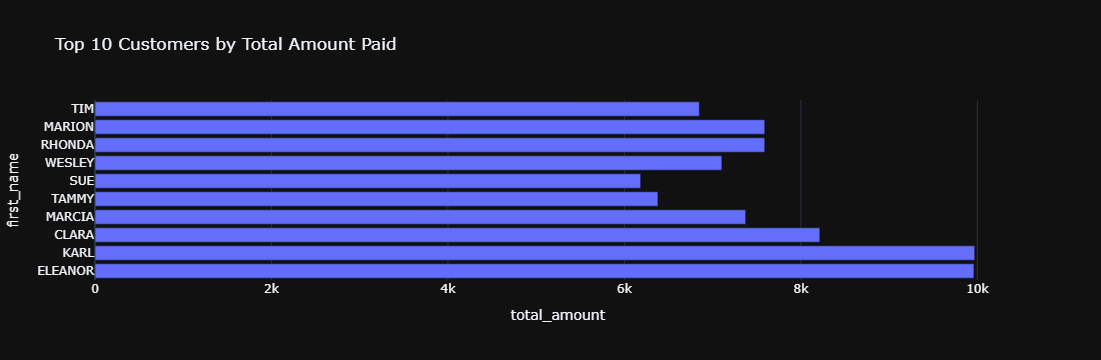

In [48]:
fig = px.bar(
    top_customers,
    x = "total_rentals",
    y = "first_name",
    orientation = "h",
    title = "Top 10 Customers by Number of Rentals",
    template = "plotly_dark"
)
fig.show()

fig = px.bar(
    top_customers,
    x = "total_amount",
    y = "first_name",
    orientation = "h",
    title = "Top 10 Customers by Total Amount Paid",
    template = "plotly_dark"
)
fig.show()

4. Rental Frequency per Customer

In [50]:
query = """
SELECT 
    c.customer_id,
    c.first_name,
    c.last_name,
    COUNT(r.rental_id) AS rental_count
FROM
    customer c
JOIN
    rental r
    ON c.customer_id = r.customer_id
GROUP BY
    c.customer_id
ORDER BY
    rental_count DESC;
"""

In [51]:
rental_freq = load_query(query)
rental_freq

,customer_id,first_name,last_name,rental_count
0,148,ELEANOR,HUNT,46
1,526,KARL,SEAL,45
2,144,CLARA,SHAW,42
3,236,MARCIA,DEAN,42
4,75,TAMMY,SANDERS,41
...,...,...,...,...
594,248,CAROLINE,BOWMAN,15
595,61,KATHERINE,RIVERA,14
596,110,TIFFANY,JORDAN,14
597,281,LEONA,OBRIEN,14


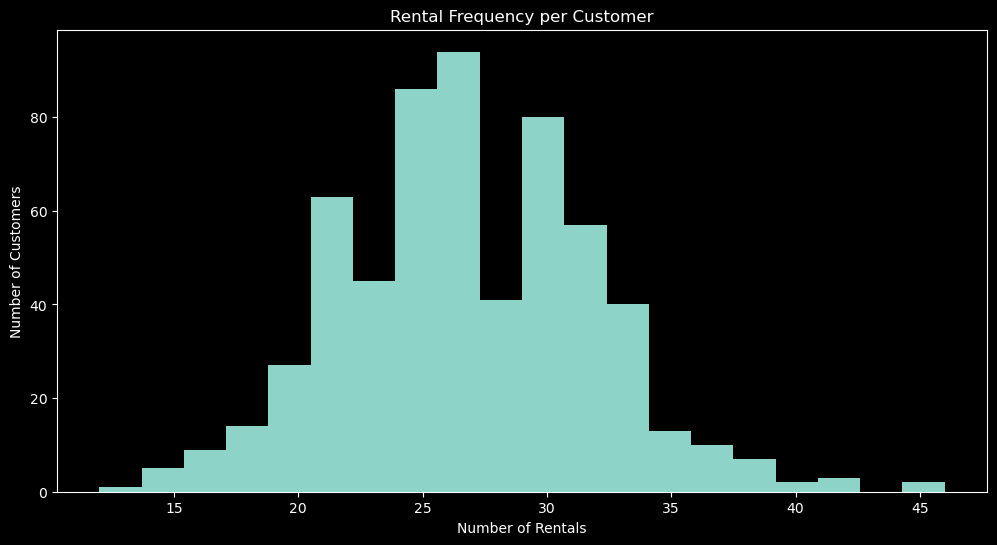

In [136]:
plt.style.use("dark_background")
plt.figure(figsize = (12,6))
plt.hist(rental_freq["rental_count"], bins = 20)
plt.xlabel("Number of Rentals")
plt.ylabel("Number of Customers")
plt.title("Rental Frequency per Customer")
plt.show()

## Film & Category Analysis

1. How many films exist per category?

In [67]:
film_category
film_fc_category = (category.merge(film_category,
                                 how = "right",
                                 on = "category_id")).merge(film,
                                                           how = "right",
                                                           on = "film_id")
film_fc_category.head(1)

,category_id,name,last_update_x,film_id,last_update_y,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,6,Documentary,2021-03-06 15:52:00,1,2021-03-06 15:53:28,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00


In [65]:
# join category -> film_category -> film

query ="""
SELECT
    c.category_id,
    c.name,
    COUNT(f.film_id) AS total_film
FROM
    category c
JOIN
    film_category fc
    ON c.category_id = fc.category_id
JOIN
    film f
    ON f.film_id = fc.film_id
GROUP BY c.name;
"""

In [66]:
film_cat = load_query(query)
film_cat

,category_id,name,total_film
0,1,Action,64
1,2,Animation,66
2,3,Children,60
3,4,Classics,57
4,5,Comedy,58
5,6,Documentary,68
6,7,Drama,62
7,8,Family,69
8,9,Foreign,73
9,10,Games,61


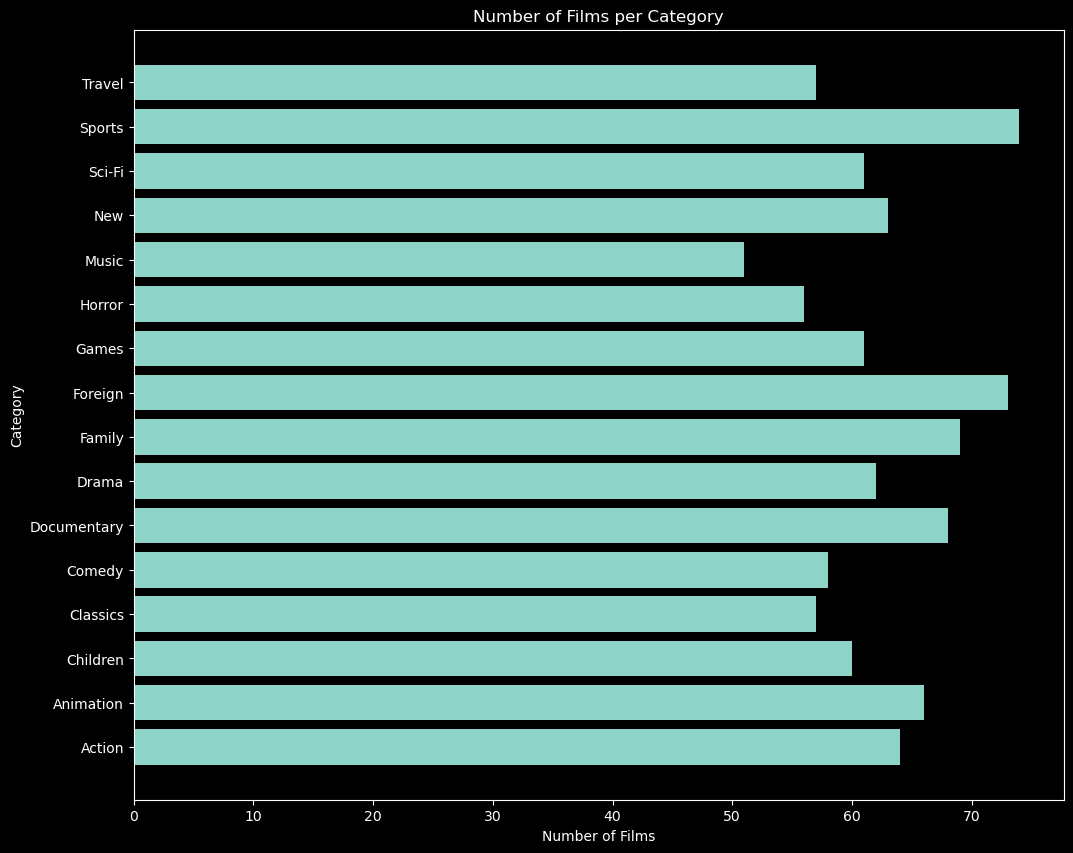

In [135]:
plt.style.use("dark_background")
plt.figure(figsize = (12,10))
plt.barh(film_cat["name"], film_cat["total_film"])
plt.xlabel("Number of Films")
plt.ylabel("Category")
plt.title("Number of Films per Category")
plt.show()

In [77]:
# fig = px.bar(
#     film_cat,
#     x = "total_film",
#     y = "name",
#     title = "Number of Films per Category",
#     orientation = "h",
#     template = "plotly_dark"
# )
# fig.update_layout(
#     height = 600,
#     width = 1000
# )
# fig.show()

2. Which film categories are rented the most?

In [89]:
# checking categories with rental
# join category -> film_category -> film -> inventory -> rental
# count the rental_id, group it by category, pass it to a dataframe. Then use pandas to get the mode
# or count the rental_id, group it by category, sort by rental_id in descending order, then limit to one

query = """
SELECT
    c.category_id,
    c.name,
    COUNT(r.rental_id) AS total_rental
FROM
    category c
JOIN
    film_category fc
    ON c.category_id = fc.category_id
JOIN
    film f
    ON f.film_id = fc.film_id
JOIN
    inventory i
    ON i.film_id = f.film_id
JOIN
    rental r
    ON r.inventory_id = i.inventory_id
GROUP BY
    c.name
ORDER BY
    total_rental DESC;
"""

In [90]:
most_rented_category = load_query(query)
most_rented_category.head(1)

,category_id,name,total_rental
0,15,Sports,1179


Sport category is the most rented category

3. Top 10 most rented films

In [93]:
# rental and film tables
# join rental, inventory, and film

query = """
SELECT
    f.title,
    COUNT(r.rental_id) AS total_rental
FROM
    film f
JOIN
    inventory i
    ON f.film_id = i.film_id
JOIN
    rental r
    ON i.inventory_id = r.inventory_id
GROUP BY
    f.title
ORDER BY
    total_rental DESC
LIMIT 10;
"""

In [94]:
top_rented_films = load_query(query)
top_rented_films

,title,total_rental
0,BUCKET BROTHERHOOD,34
1,ROCKETEER MOTHER,33
2,SCALAWAG DUCK,32
3,RIDGEMONT SUBMARINE,32
4,JUGGLER HARDLY,32
5,GRIT CLOCKWORK,32
6,FORWARD TEMPLE,32
7,ZORRO ARK,31
8,WIFE TURN,31
9,TIMBERLAND SKY,31


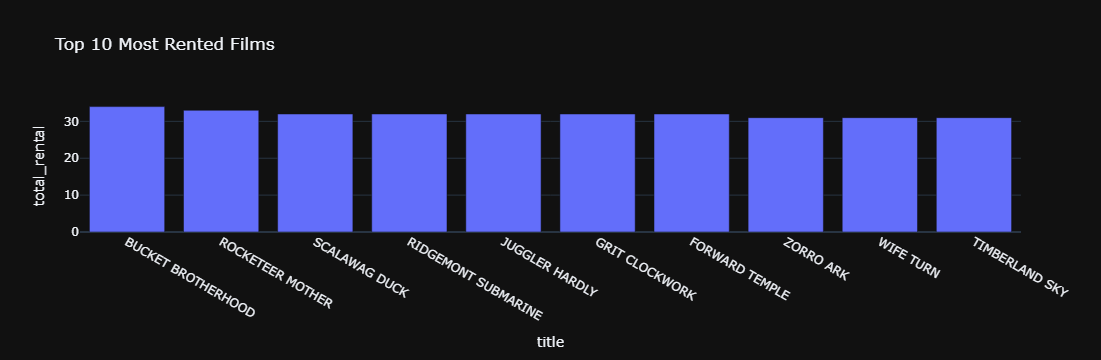

In [95]:
fig = px.bar(
    top_rented_films,
    x = "title",
    y = "total_rental",
    title = "Top 10 Most Rented Films",
    template = "plotly_dark"
)
fig.show()

4. Average rental duration by category

In [103]:
#checking for empty cells in return date
rental["return_date"].isna().sum()

np.int64(183)

In [108]:
# category and rental tables
# join category, film categroy, film, inventory, rental
# JULIANDAY() converts dates to a numeric format, allowing subtraction.

query = """
SELECT
    c.name,
    ROUND(AVG(JULIANDAY(r.return_date) - JULIANDAY(r.rental_date))) AS  avg_rental_duration
FROM
    category c
JOIN
    film_category fc
    ON c.category_id = fc.category_id
JOIN
    film f
    ON fc.film_id = f.film_id
JOIN
    inventory i
    ON f.film_id = i.film_id
JOIN
    rental r
    ON i.inventory_id = r.inventory_id
WHERE
    r.return_date IS NOT NULL
GROUP BY
    c.name;
"""

In [109]:
avg_rd = load_query(query)
avg_rd

,name,avg_rental_duration
0,Action,5.0
1,Animation,5.0
2,Children,5.0
3,Classics,5.0
4,Comedy,5.0
5,Documentary,5.0
6,Drama,5.0
7,Family,5.0
8,Foreign,5.0
9,Games,5.0


## Revenue Analysis

1.	Total revenue generated

In [111]:
# payment table
payment.head(2)

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,1,76.0,2.99,2005-05-25 11:30:37.000,2021-03-06 15:55:57
1,2,1,1,573.0,0.99,2005-05-28 10:35:23.000,2021-03-06 15:55:57


In [114]:
total_revenue = payment["amount"].sum()
print(total_revenue)

67416.51000000001


2. Revenue by:
   - Film category
   - Store
   - Month

In [115]:
# revenue by film category
# category and payment table

query = """
SELECT
    c.name,
    ROUND(SUM(p.amount)) AS total_revenue
FROM
    category c
JOIN
    film_category fc
    ON c.category_id = fc.category_id
JOIN
    film f
    ON fc.film_id = f.film_id
JOIN
    inventory i
    ON f.film_id = i.film_id
JOIN
    rental r
    ON i.inventory_id = r.inventory_id
JOIN
    payment p
    ON r.rental_id = p.rental_id
GROUP BY
    c.name;
"""

In [116]:
revenue_fc = load_query(query)
revenue_fc

,name,total_revenue
0,Action,4376.0
1,Animation,4656.0
2,Children,3656.0
3,Classics,3640.0
4,Comedy,4384.0
5,Documentary,4218.0
6,Drama,4587.0
7,Family,4226.0
8,Foreign,4271.0
9,Games,4281.0


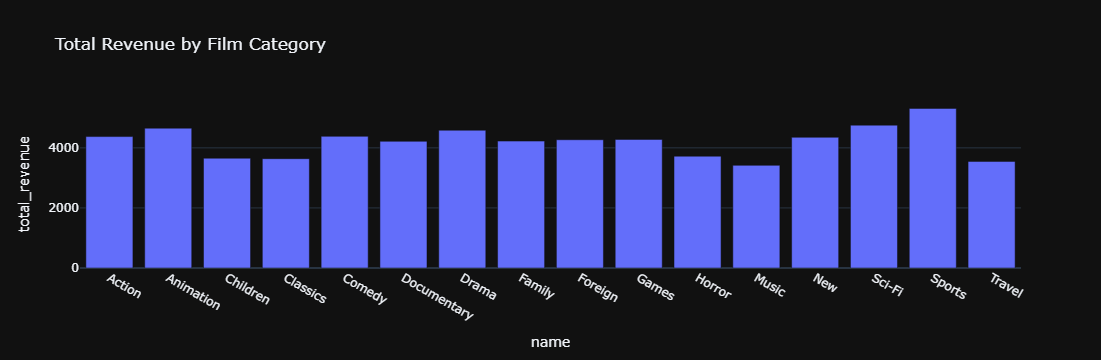

In [118]:
fig = px.bar(
    revenue_fc,
    x = "name",
    y = "total_revenue",
    title = "Total Revenue by Film Category",
    template = "plotly_dark"
)
fig.show()

In [120]:
# revenue by store
# join store and payment table through customer table

query = """
SELECT
    s.store_id,
    ROUND(SUM(p.amount)) AS total_revenue
FROM
    store s
JOIN
    customer c
    ON s.store_id = c.store_id
JOIN
    payment p
    ON c.customer_id = p.customer_id
GROUP BY
    s.store_id;
"""

In [121]:
store_revenue = load_query(query)
store_revenue

,store_id,total_revenue
0,1,37002.0
1,2,30415.0


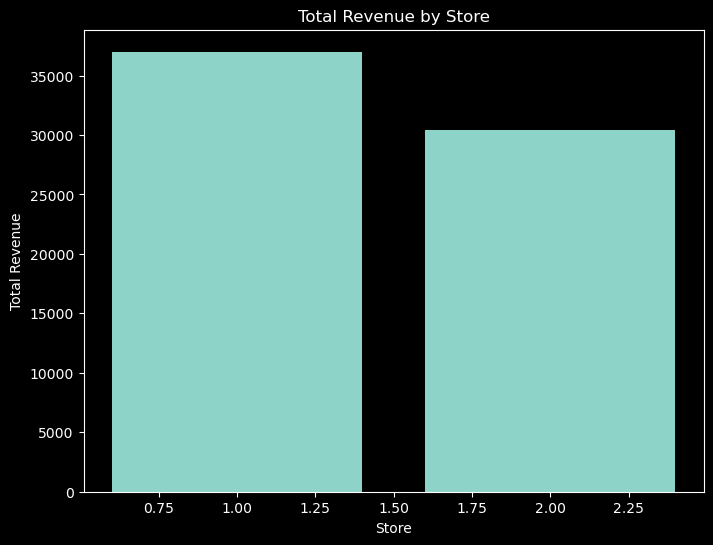

In [134]:
plt.style.use("dark_background")
plt.figure(figsize = (8,6))
plt.bar(store_revenue["store_id"], store_revenue["total_revenue"])
plt.xlabel("Store")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Store")
plt.show()

In [131]:
# revenue by month
# extract the month from payment date

payment["payment_date"] = pd.to_datetime(payment["payment_date"], errors = "coerce")
payment["payment_month"] = payment["payment_date"].dt.month_name()
payment.head()

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update,payment_month
0,1,1,1,76.0,2.99,2005-05-25 11:30:37,2021-03-06 15:55:57,May
1,2,1,1,573.0,0.99,2005-05-28 10:35:23,2021-03-06 15:55:57,May
2,3,1,1,1185.0,5.99,2005-06-15 00:54:12,2021-03-06 15:55:57,June
3,4,1,2,1422.0,0.99,2005-06-15 18:02:53,2021-03-06 15:55:57,June
4,5,1,2,1476.0,9.99,2005-06-15 21:08:46,2021-03-06 15:55:57,June


In [132]:
month_revenue = payment.groupby("payment_month")["amount"].sum().reset_index()
month_revenue

,payment_month,amount
0,August,24072.13
1,February,514.18
2,July,28373.89
3,June,9631.88
4,May,4824.43


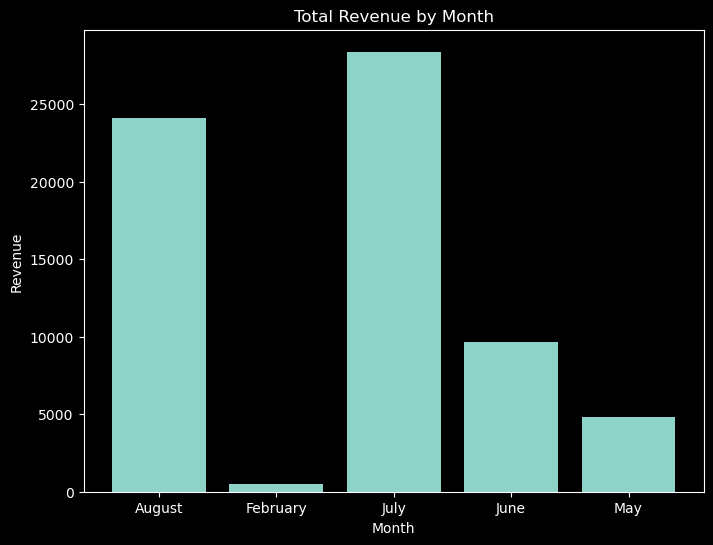

In [133]:
plt.style.use("dark_background")
plt.figure(figsize = (8,6))
plt.bar(month_revenue["payment_month"], month_revenue["amount"])
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Total Revenue by Month")
plt.show()

3. Top revenue-generating films

In [138]:
# film table and payment table
# join film -> inventory -> rental -> payment
# group by film name, sum amount, order by total amount in descending order

query = """
SELECT
    f.title,
    ROUND(SUM(p.amount)) AS total_revenue
FROM
    film f
JOIN
    inventory i
    ON f.film_id = i.film_id
JOIN
    rental r
    ON i.inventory_id = r.inventory_id
JOIN
    payment p
    ON r.rental_id = p.rental_id
GROUP BY
    f.title
ORDER BY
    total_revenue DESC
LIMIT 10;
"""

In [139]:
top_films_revenue = load_query(query)
top_films_revenue

,title,total_revenue
0,TELEGRAPH VOYAGE,232.0
1,WIFE TURN,224.0
2,ZORRO ARK,215.0
3,GOODFELLAS SALUTE,210.0
4,SATURDAY LAMBS,205.0
5,TITANS JERK,202.0
6,TORQUE BOUND,199.0
7,HARRY IDAHO,196.0
8,INNOCENT USUAL,192.0
9,HUSTLER PARTY,191.0


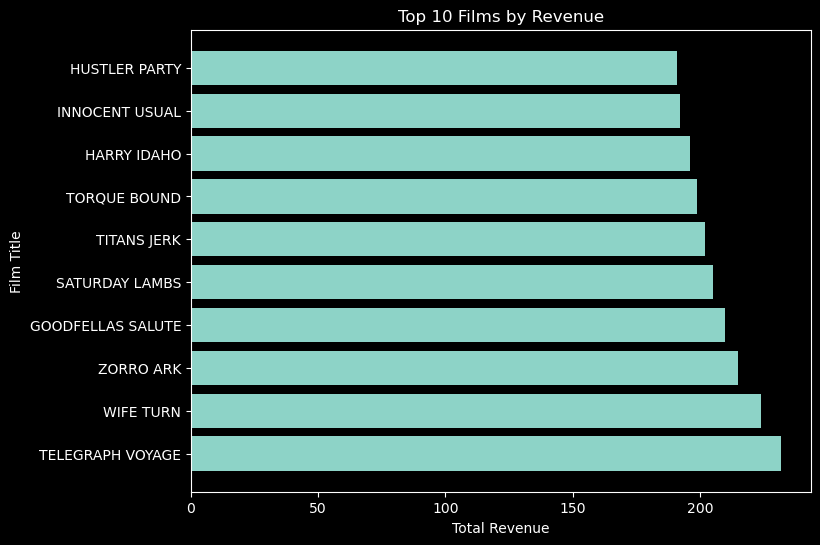

In [142]:
plt.style.use("dark_background")
plt.figure(figsize = (8,6))
plt.barh(top_films_revenue["title"], top_films_revenue["total_revenue"])
plt.xlabel("Total Revenue")
plt.ylabel("Film Title")
plt.title("Top 10 Films by Revenue")
plt.show()

4. Payment method distribution

The Sakila database does not capture payment method information. Therefore, payment method distribution analysis could not be performed.

## Staff & Store Performance

1. Revenue generated per staff member

In [143]:
# staff and payment table

query = """
SELECT
    s.staff_id,
    s.first_name,
    s.username,
    ROUND(SUM(p.amount)) AS total_revenue
FROM
    staff s
JOIN
    payment p
    ON s.staff_id = p.staff_id
GROUP BY
    s.staff_id;
"""

In [144]:
rev_staff = load_query(query)
rev_staff

,staff_id,first_name,username,total_revenue
0,1,Mike,Mike,33489.0
1,2,Jon,Jon,33927.0


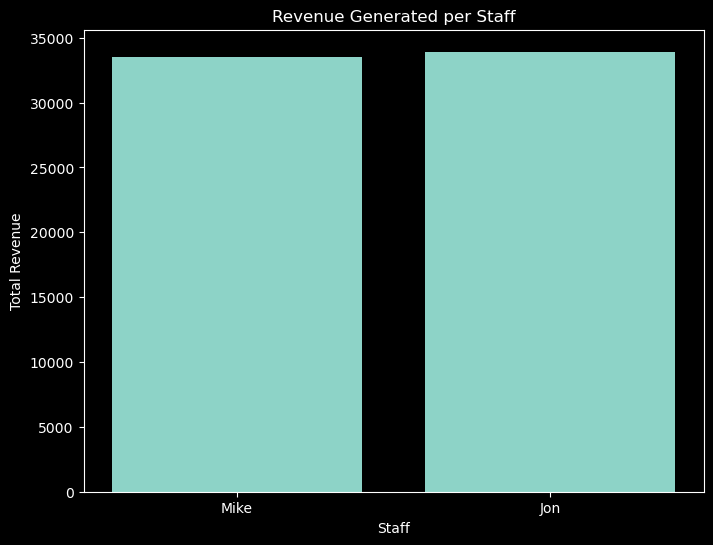

In [145]:
plt.style.use("dark_background")
plt.figure(figsize = (8,6))
plt.bar(rev_staff["first_name"], rev_staff["total_revenue"])
plt.xlabel("Staff")
plt.ylabel("Total Revenue")
plt.title("Revenue Generated per Staff")
plt.show()

2. Number of rentals handled per staff